<a href="https://colab.research.google.com/github/pargaw/pyCt/blob/main/Exponential_Growth_Model_Code_For_Discrepancies_in_Epidemiological_Modeling_of_Aggregated_Heterogeneous_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exponential Growth Model Code For *Discrepancies in Epidemiological Modeling of Aggregated Heterogeneous Data*
---

## Summary of Baseline Paper
---
["Estimating epidemiologic dynamics from cross-sectional viral load distributions" Paper](https://www.medrxiv.org/content/10.1101/2020.10.08.20204222v2.full.pdf)

During a pandemic, accruate estimation of epidemic growth rates is extremely informative and drives major policies and procedures. In order to measure this growth rate, many use $R_t$ (time-varying effective reprodcutive number) usually based on reverse-transcription quantitative polymerase chain reaction (RT-qPRC) testing. 

### $R_t$ is flawed
---
$$\begin{cases}
\bullet \text{reporting delays} \\
\bullet \text{limited testing capabilities and reliability} \\
\bullet \text{changing test availability}
\end{cases} \implies 
\text{changes in case counts may not accruately reflect depidemic dynamics}
$$
* $R_t$ is calculated using the nubmer of new positives among the tests conducted each day; however this data represents the growth rate of positive tests and not the incidence of infection. 
* Any case count based methods exhibit bias. 
* $R_t$ requires adjustements to account for changes in testing capacity, delay between infection and test report date, and conversion from prevalence to incidence.

### New Method and Contribution
---
1) Demonstrate that population-level changes in distribution of $Ct$ values can arise as epidemiological phenomenon
* $Ct$ (cycle threshold) values measure viral load.
* They argue that $Ct$ values for indicating epidemic decline is better
  * $Ct$ directly maps between the distribution of $Ct$ values and infection incidence $\implies$ $Ct$ based methods are agnostic to changing test rates and provide unbiased growth rate estimates.

2) New Method using $Ct$ values
* New method is not biased and can obtain accurate estimates of epidemic trajectory
* New method uses discarded testing data from single or successive cross-sectional samples for simulation; so it does not require repeat measurements/testing
* Uses population level distribution of $Ct$ values which in many samples indicate a population with predominantly low viral loads. (It has been shown that a systemic incline in distribution of $Ct$ values is correlated with epidemic decline)

## Relationship Between $Ct$ Values and Epidemic Dynamics
---
### Generating $Ct$ Values
---
* First simulate infections values under a deterministic **susceptible-exposed-infectious-recovered (SEIR)** model.
* At selected testing days during the outbreak, simulated $Ct$ values are observed from a random sample of the population using the **Ct distribution model**.
* These simulated samples at time point $t$ recreate realistic cross-sectional distributions of detectable viral loads across the course of an epidemic. 
* Individual $Ct$ values have high uncertainty, so they use population-level observed $Ct$ values.
* $Ct$ distribution becomes estimable function $f$ of times since infection, that is used to estimate epidemic growth rate. 

### Other Considerations
---
* Viral load measurements based on Symptom-based Surveillance is annother idea.
* However there is a distribution of delays between infection date and tests date and confirmation delay $\implies$ time-since-infection distribution of individuals tested based on symptom onset (measure viral load) is influence by stage of the epidemic. 

## Inferring Epidemic Trajetory Using a Single Cross-Section of RT-qPCR Test Results
---
Combines two models:

1) The likelihood of observing a $Ct$ value or negative result | having been infected on a given day
  * Bayesian model and defined priors for the mode and range of $Ct$ values following infection literature

2) The likelihood of being infected on a given day prior to the sample day
  * constant exponential grwoth of infection incidence
    * possible shape of outbreak trajectory is constant growth rate
  * infection using a SEIR model
    * assumes growth rate changes daily depending on remaining number of susceptible individuals

### Step 1: Estimate prevalence and incidence using standard compartmental (SEEIRR) model fit to prevalence at three sampling times

### Step 2: Each sampling time generates $Ct$ samples which gives a distribution (Cross Section)

### Step 3: Fit expontential growth and simple SEIR models using the $Ct$ likelihood of each cross section to get posterior distributions for the epidemic trajectory up to that time point

### Step 4: Evaluate prediction by comparing prediction and data growth rates and prevelant points

<img src="https://drive.google.com/uc?export=view&id=19l0hHkmVW3D2fKyBTA3bSwUAKyHNt5p9">

## Inferring Epidemic Trajectory Using Multiple Cross-Sections
---
* Extend new method to combine data from multiple-cross sections which allows for more reliably estimated epidemic trajectory
* Use this method to recover parameters from SEIR-based simulations
* Compare preformance of $R_t$ estimation using reported case counts with performance of their model when one, two , or three surveillance samples are available with observed $Ct$ values.

### Results
---
* Except when only one sampel is used, $Ct$-based methods fit to an SEIR model exhibit minimal bias
* Reported case count methods exhibit noticeable bias.
* $Ct$ based methods exhibit higher variability.
* All of $Ct$ based methods achieve at least nominal coverage of the 95% credible intervals among 100 simulations.
* Reported case count methods have coverage below 70%. 

## Reconstructing Complex Incidence Curves $Ct$ Values
---
* We want to understand incidence trends usually with sparse data.
* Objective: Reconstruct the entire incidence curve using routinely collected RT-qPRC data.
* Simple epidemic models are effective with relatiely closed populations where epidemic start time is approximately known.
* However epidemics usually follow a more complex trajectory, difficult to model parametrically and doesn't account of non-pharmaceutical interventions unless specified in the model.

### Solution: Use a Gaussian Process to estiamte daily probabilites of infection without making strong assumptions about the epidemic trajectory.

#### First use observed $Ct$ values to esimate the daily growth rate of infections using the SEIR model on single cross-sections

#### Second use multiple cross sections to fit a GP model and estimate full epidemic trajectory by sequentially updating the model with new samples

## Discussion
---
* RT-qPCR $Ct$ values are highly informative of population-level dynamics and can estimate epdiemic growth rates independent of assumptions about the intensity of testing

### Disclaimers on Using $Ct$
---
* Should be cautious when observed $Ct$ values are not from a population census or largely random sample
* Testing is based primarily on the presence of symptoms or follow up contacts of infected individuals which would skew the distribution and not be representative of the population as a whole. 
* Most effective when sureillance samples are obtained independent of COVID-19 symptoms. 
* Different swab types, sample types, instruments. or $Ct$ thresholds may alter the variability of the $Ct$ distribution.

#### How to Improve Results
---
* **choosing a good prior**: setting specific calibrations e.g. based on a reference range of $Ct$ values; using results of a viral kinetics model to inform priors on key parameters when estimating growth rates
* incorporate individual-level features that may affect viral load e.g. symptom status, age, antiviral treatment, etc.
* use multiple types of tests (e.g. antigen and PCR) and reduce uncertainty
* if variant strains are associated with different viral load kinetics and become common, we need to incorporate those as well

#### Limitations of Method
---
* Bayesian framework is highly sensitive to priors and parametric assumptions. If chosen incorrectly, inference may not be reliable.
* Incidence and skewness of $Ct$ distribution become unreliable when there are very few positive cases
  * Fix: use a MCMC algorithm to accurately estimate parameters of prior distribution of a hierarchal model
* May overstate uncertainty in viral load distribution if restuls from different machines are used to inform the prior
  * Fix: underestand why different settings are comparable to better infrom the prior.
*$Ct$ values cannot be relied on for individual-level decision making

# Implementation
---

In [ ]:
pip install --upgrade pymc3

In [1]:
# initalize tools
import numpy as np
import pandas as pd
import pymc3 as pm
import scipy as sp
import matplotlib.pyplot as plt
from pymc3 import model_to_graphviz, Model
from google.colab import files

np.random.seed(123)

In [ ]:
print(pm.__version__)

3.11.2


## Inferring Epidemic Trajectory Using a Single Cross-Section
---
We model the variation in observed Ct values arising from individual-level viral growth and estimate the distribution of observed Ct values as a function of times since infection. We then use this function to estimate the epidemic growth rate conditional on a set of observed Ct values. 

We are given a single cross-section of RT-qPCR test results. We combine 

1. The likelihood of observing a Ct value on having been infected on a given day

2. The likelihood of being infected on a given date prior to the sample date.

### 1. Ct Value Model
---
The mathematical model that describes the distribution of observed SARS-CoV-2 viral loads over time following infection. They use a parametric model describing the the modal Ct value, $C_{mode}(a)$ for an individual $a$ days after infection.

Since they are interested in a population-level distribution and not individual trajetctories, the put a **Gumbel distribution** prior on the observed $Ct$ values with mean $C_{mode}(a) - \sigma(a)\gamma$, and variance $\frac{\sigma(a)^2\pi^2}{6}$ where $\gamma$ is Euler's constant.

#### Why a Gumbel Distribution?
---
* $f(x; \mu, \beta) = \frac{1}{\beta}e^{-(z + e^{-z})}$ where $z = \frac{x - \mu}{\beta}$.
* used to model the distribution of the maximum or minimum number of samples of various distributions.
* Captures the variation resulting from both swabbing variability and inidividual-level difference in viral kinetics.
* Captures overdispersion of high measured Ct values.
* We write $C(a) \sim Gumbel(C_{mode}(a), \sigma(a))$.

In [2]:
# calculates the modal Ct value according to two-hinge function
# specified on pg.3 of the supplementary material
# init values as specified on pg. 30 of suppementary material
c_zero = 40
c_peak = 19.73598747
c_switch = 38.0
t_eclipse = 0.0
# global limit of detection variable
c_LOD = 40.0
t_peak = 5.0
t_switch = 13.29211948
# limit of detection (inf/max integer values)
t_LOD = 2147483647
# daily probability of individual fully cleraing virus
# and becoming undectable
p_addl = 0.103299323

def calculate_c_mode(a):
  # undetectable true value
  if (a <= t_eclipse):
    return c_zero
  # log viral load increases
  elif (t_eclipse < a and a <= t_eclipse + t_peak):
    return c_zero + (c_peak - c_zero)/(t_peak) * (a - t_eclipse)
  # log viral load wanes
  elif (t_eclipse + t_peak < a and a <= t_eclipse + t_peak + t_switch):
    return c_peak + (c_switch - c_peak)/(t_switch) * (a - t_eclipse - t_peak)
  # log viral load wanes at a slower linear rate
  else:
    return c_switch + (c_LOD - c_switch)/(t_LOD - t_switch - t_peak - t_eclipse) * (a - t_eclipse - t_peak - t_switch)

In [3]:
# calculates scale parameter sigma_a
# init values
sigma_obs = 5.0
s_mod = 0.788828786
t_mod = 14.0

def calculate_sigma(a):
  if (a < t_eclipse + t_peak + t_switch):
    return sigma_obs
  elif (t_eclipse + t_peak + t_switch <= a and a < t_eclipse + t_peak + t_switch + t_mod):
    return sigma_obs * (1 - (((1 - s_mod)/t_mod) * (a - t_eclipse - t_peak - t_switch)))
  else:
    return sigma_obs * s_mod

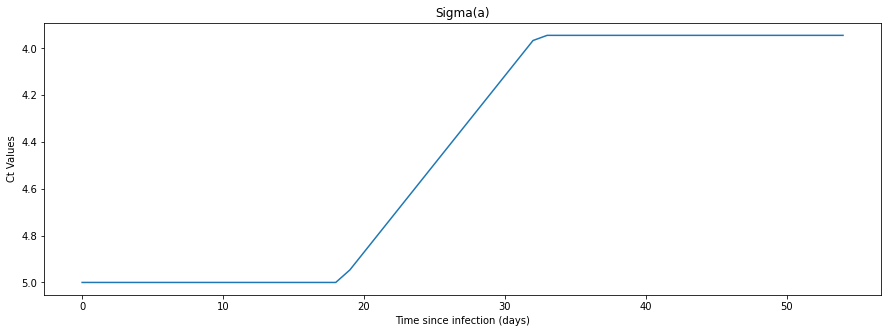

In [4]:
# visual sanity check for Ct simulations
# calculate
a_s = np.array(range(55))
sigmas = np.array([calculate_sigma(a) for a in a_s])

# plots
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

ax.plot(a_s, sigmas)
ax.set_xlabel("Time since infection (days)")
ax.set_ylabel("Ct Values")
ax.set_title("Sigma(a)")
# inverts axis
plt.gca().invert_yaxis()

plt.show()

In [5]:
# samples C(a)
def sample_C(a, no_variance=True):
  mean = calculate_c_mode(a)
  if (no_variance):
    variance = 0
  else:
    variance = calculate_sigma(a)
  return sp.stats.gumbel_r.rvs(mean, variance)

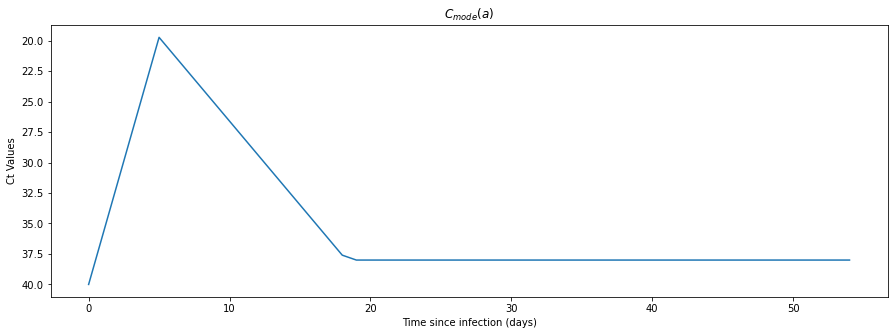

In [6]:
# visual sanity check for Ct simulations
# calculate
a_s = np.array(range(55))
# ct_samples = np.array([[sample_C(a, no_variance=False) for a in a_s] for i in range(100)])
cts = np.array([sample_C(a) for a in a_s])
# plots
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(a_s, cts)
# for ct in ct_samples:
#   # plot prevalence
#   ax.plot(a_s, ct)
ax.set_xlabel("Time since infection (days)")
ax.set_ylabel("Ct Values")
ax.set_title("$C_{mode}(a)$")
# inverts axis
plt.gca().invert_yaxis()

plt.show()

In [7]:
def gumbel_pdf(x, mean, variance):
  y = (x - mean) / variance
  pdf = np.exp(-(y + np.exp(-y)))
  return pdf / variance

# cdf of gumbel ct distribution
def cdf_a(a, limit):
  mean = calculate_c_mode(a)
  variance = calculate_sigma(a)
  return sp.stats.gumbel_r.cdf(limit, mean, variance)

# pdf of gumbel ct distribution
# p_a is a function calculating the probability that an individuals Ct value is X_i at day t - a
# we don't use the SCIPY package sp.stats.gumbel_r.pdf(x, mean, variance) because it won't
# work with Pymc3
def p_a_multi(a, x):
  mode = calculate_c_mode(a)
  sigma = calculate_sigma(a)
  normalizer = cdf_a(a, c_LOD) - cdf_a(a, 0)
  result = gumbel_pdf(x, mode, sigma) / normalizer

  return result

def p_a_uni(a, x):
  if (x >= 40):
    return 0
  mode = calculate_c_mode(a)
  sigma = calculate_sigma(a)
  normalizer = cdf_a(a, c_LOD) - cdf_a(a, 0)
  result = gumbel_pdf(x, mode, sigma) / normalizer

  return result

In [8]:
# phi_a is a function calculating the probability that a Ct value is detectable a days after infection
def phi_a(a):
  prob_ca_leq_clod = cdf_a(a, c_LOD)
  if (a <= t_eclipse + t_peak + t_switch):
    return prob_ca_leq_clod
  else:
    return prob_ca_leq_clod * (1 - p_addl) ** (a - t_eclipse - t_peak - t_switch)

Text(0.5, 1.0, 'Phi of Ct Value')

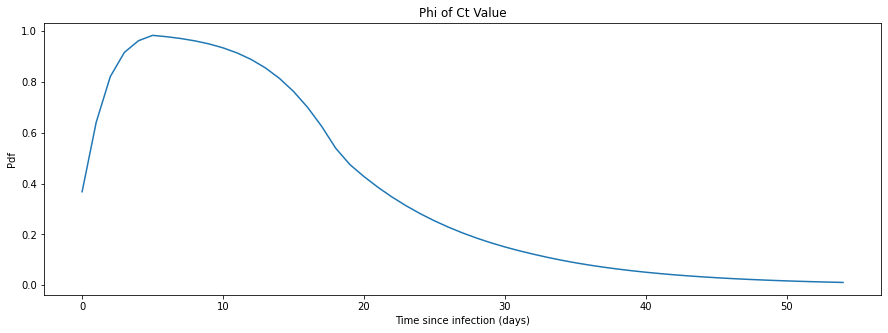

In [9]:
# visual check for phi_a
phis = np.array([phi_a(a) for a in a_s])

# plots
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
# plot pdf
ax.plot(a_s, phis)
ax.set_xlabel("Time since infection (days)")
ax.set_ylabel("Pdf")
ax.set_title("Phi of Ct Value")

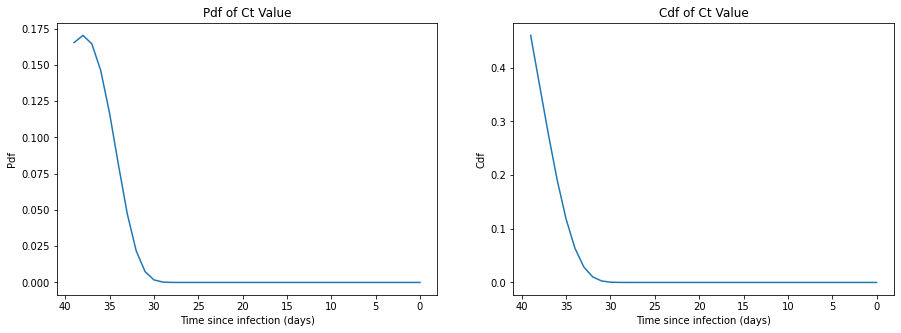

In [10]:
# visual sanity check for Ct simulations
# calculate
xs = np.array(range(40))
pdfs = np.array([p_a_multi(35, x) for x in xs])
cdfs = np.array([cdf_a(35, lim) for lim in xs])

# plots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
# plot pdf
ax[0].plot(xs, pdfs)
ax[0].set_xlabel("Time since infection (days)")
ax[0].set_ylabel("Pdf")
ax[0].set_title("Pdf of Ct Value")
ax[0].invert_xaxis()
# plot cdf
ax[1].plot(xs, cdfs)
ax[1].set_xlabel("Time since infection (days)")
ax[1].set_ylabel("Cdf")
ax[1].set_title("Cdf of Ct Value")
ax[1].invert_xaxis()


plt.show()

### Likelihood of Daily Probability of Infection
---
For testing day $t$: let $\pi_{t - a} := $probability that a randomly-selected individual in the population was infected on day $t - a$.

Therefore, let $\pi_{t - A_{max}},...,\pi_{t - 1}$ be the daily probabilities of infection for the whole population for $A_{max}$ days to 1 day prior to testing day $t$.

Let $p_a(x) :=$ probability that the Ct value is $x$ for a test conducted $a$ days after infection. 

Let $\phi_a :=$ probability of a Ct value being detectable $a$ days after infection.

Let PCR test results from a sample of $n$ individuals be recorded $X_1,...,X_n$.

Then, for $x_i \leq C_{LOD}$ (a detectable Ct value): 

**The probability of individual $i$ having Ct value $x_i$** is:

$$
P(X_i = x_i | \pi_{t - A_{max}},..,\pi_{t - 1}) = \sum_{a = 1}^{A_{max}} p_a(x_i)\pi_{t - a}
$$

(a sum of days before test of probability of having Ct value on day $t - a$ and probability of being infected on day $t - a$)

**The probability of a randomly-chosen individual being detectable to PCR on testing day $t$** is:

$$
P(X_i \leq C_{LOD} | \pi_{t - A_{max}},..,\pi_{t - 1}) = \sum_{a = 1}^{A_{max}} \phi_a\pi_{t - a}
$$

**The likelihood for the $n$ PCR values** is:

$$
\mathcal{L}(\pi_{t - A_{max}},...,\pi_{t - a} | X_1,...,X_n) = \prod_{i = 1}^n \bigg[ \bigg(\sum_{a = 1}^{A_{max}} p_a(X_i) * \phi_a * \pi_{t - a}\bigg)^{\mathbb{I}(X_i \leq C_{LOD})} \bigg( 1 - \sum_{a = 1}^{A_{max}}\phi_a\pi_{t - a}\bigg)^{\mathbb{I}(X_i > C_{LOD})} \bigg]
$$

This is the probability that data point $i$ has detectable Ct value $X_i$ if they are detectable or probability of being not detectable if not detectable, for all data points.

This likelihood can be maximized to get nonparametric estimates of the daily probability of infection with constraint $\sum_{a = 1}^{A_{max}} \pi_{t - a} \leq 1$

Therefore the log likelihood is:

$$
\log \mathcal{L}(\pi_{t - A_{max}},...,\pi_{t - a} | X_1,...,X_n) = \log \prod_{i = 1}^n \bigg[ \bigg(\sum_{a = 1}^{A_{max}} p_a(X_i) * \phi_a * \pi_{t - a}\bigg)^{\mathbb{I}(X_i \leq C_{LOD})} \bigg( 1 - \sum_{a = 1}^{A_{max}}\phi_a\pi_{t - a}\bigg)^{\mathbb{I}(X_i > C_{LOD})} \bigg]
$$

$$
= \sum_{i = 1}^n \log \bigg[ \bigg(\sum_{a = 1}^{A_{max}} p_a(X_i) * \phi_a * \pi_{t - a}\bigg)^{\mathbb{I}(X_i \leq C_{LOD})} \bigg( 1 - \sum_{a = 1}^{A_{max}}\phi_a\pi_{t - a}\bigg)^{\mathbb{I}(X_i > C_{LOD})} \bigg]
$$

$$
= \sum_{i = 1}^n \log \bigg(\sum_{a = 1}^{A_{max}} p_a(X_i) * \phi_a * \pi_{t - a}\bigg)^{\mathbb{I}(X_i \leq C_{LOD})} + \log \bigg( 1 - \sum_{a = 1}^{A_{max}}\phi_a\pi_{t - a}\bigg)^{\mathbb{I}(X_i > C_{LOD})}
$$

$$
= \sum_{i = 1}^n \mathbb{I}(X_i \leq C_{LOD}) * \log \bigg(\sum_{a = 1}^{A_{max}} p_a(X_i) * \phi_a * \pi_{t - a}\bigg) + \mathbb{I}(X_i > C_{LOD}) * \log \bigg( 1 - \sum_{a = 1}^{A_{max}}\phi_a\pi_{t - a}\bigg)
$$

$$
= \sum_{i, X_i \leq C_{LOD}} \log \bigg(\sum_{a = 1}^{A_{max}} p_a(X_i) * \phi_a * \pi_{t - a}\bigg) + \sum_{i, X_i > C_{LOD}} \log \bigg( 1 - \sum_{a = 1}^{A_{max}}\phi_a\pi_{t - a}\bigg)
$$

$$
= \sum_{i, X_i \leq C_{LOD}} \log \bigg(\sum_{a = 1}^{A_{max}} p_a(X_i) * \phi_a * \pi_{t - a}\bigg) + |\{X_i | X_i > C_{LOD} \}| * \log \bigg( 1 - \sum_{a = 1}^{A_{max}}\phi_a\pi_{t - a}\bigg)
$$

### 2. Epidemic Growth Rate Estimator
---
To improve the interpretability of the stimates, they consider the following parametric models.

## Exponential Growth Model
---
* Assumes constant growth rate.
* $\pi_{t - a} = \pi_0\exp[\beta(t - a)]$ where $\beta$ is the growth rate.
* We assume all Ct values are detectable:
* $\implies \mathcal{L}(\beta | X_1,...,X_n) = \frac{\prod_{i = 1}^n (\sum_{a = 1}^{A_{max}} p_a(X_i)\phi_a\exp[\beta(t - a)])}{( \sum_{a = 1}^{A_{max}}\phi_a\exp[\beta(t - a)])^n}$
Since the likelihood can easily lead to overflow values, we use log-likelihood which is more stable. Using the log-likelihood does not disrupt the optimization problem because log is monotonic.
$$\implies \mathcal{l}(\beta | X_1,...,X_n) = \log \mathcal{L}$$
$$ = \sum_{i = 1}^n \log (\sum_{a = 1}^{A_{max}} p_a(X_i)\phi_a\exp[\beta(t - a)]) - n \log( \sum_{a = 1}^{A_{max}}\phi_a\exp[\beta(t - a)])$$

(ignoring $\pi_0$)
* Assume a prior on $\beta$, namely $\beta \sim \mathcal{N}(0, 0.25)$ and along with the likelihood, sample from the posterior distribution using MCMC.
* $p_a(X_i)$ is the probability of observing Ct value of $X_i$ given that user $i$ was infected $a$ days ago. This means $i$ must be detectable. This is why the inner value on the numerator is $p_a(X_i)\phi_a\exp[\beta(t - a)]$ and not $p_a(X_i)\exp[\beta(t - a)]$

### Likelihood for Only Detectable Ct Values
---

In [11]:
# some constants
t_exp = 35
A_max = 35

In [12]:
# x is a single data point
# A_max is the maximum number of days before test day that we consider
# beta is the growth rate parameter
# probs is a function that outputs the probability of daily incidence
def calculate_prob(x, A_max, probs):
  result = 0
  # we need to keep a sum of the probabilities in order to calculate an
  # actual probability. right now probs returns a real value
  # probs_sum = 0
  for a in range(A_max):
    result += p_a_multi(a, x) * phi_a(a) * probs(a)
  return result

# beta is the growth rate parameter
# A_max is the maximum number of days before test day that we consider
# probs is a function that outputs the probability of daily incidence
def calculate_detectable_prob(A_max, probs):
  result = 0
  for a in range(A_max):
    result += phi_a(a) * probs(a)
  return result

In [13]:
def compute_ct_likelihood_observable(X, stop_time, prob_func):
  logprob = np.log(calculate_detectable_prob(stop_time, prob_func))
  n = X.size
  sum = pm.math.sum(np.log(calculate_prob(X, stop_time, prob_func)))
  return sum - n * logprob 

In [14]:
# each entry of the resulting vector is a probability
# for pymc3 implementation
def calculate_exp_vector(beta, A_max, pi0=1):
  result = [np.exp(beta * (t_exp - i)) for i in range(A_max)]
  total_sum = pm.math.sum(result)
  return pi0 * (result / total_sum)

In [15]:
# for the exponential growth model, we always set t = 35
# we assume X only contains detectable Ct values
# for detectable values likelihood, pi0 = 1
def compute_exp_growth_log_likelihood(beta, X):
  exponential_probs = calculate_exp_vector(beta, A_max)
  exponential_prob_func = lambda a: exponential_probs[a]
  return compute_ct_likelihood_observable(X, A_max, exponential_prob_func)

### Likelihood for All Ct Values
---

In [16]:
# A_max is the maximum number of days before test day that we consider
# probs is a function that outputs the probability of daily incidence
def calculate_undetectable_prob(A_max, probs):
  return 1 - calculate_detectable_prob(A_max, probs)

def compute_ct_likelihood_all(detectableX, num_undetectable, stop_time, prob_func):
  undetectable_logprob = np.log(calculate_undetectable_prob(stop_time, prob_func))
  sum = pm.math.sum(np.log(calculate_prob(detectableX, stop_time, prob_func)))
  # likelihood of detectables + likelihood of undetectables
  return sum + num_undetectable * undetectable_logprob

# likelihood for the exponential growth model
# X contains both detectable and undectable values
def compute_exp_growth_log_likelihood_all(beta, pi0, detectableX, num_undetectable):
  exponential_probs = calculate_exp_vector(beta, A_max, pi0)
  exponential_prob_func = lambda a: exponential_probs[a]
  return compute_ct_likelihood_all(detectableX, num_undetectable, A_max, exponential_prob_func)

In [17]:
## For Sanity Checks ##
# for the exponential growth model, we always set t = 35
def regular_exp_llkhd(beta, X):
  exponential_probs = calculate_exp(beta, A_max)
  exponential_prob_func = lambda a: exponential_probs[t_exp -1 - a]
  logprob = np.log(calculate_detectable_prob(A_max, exponential_prob_func))
  n = X.size
  sum = np.sum(np.log(calculate_prob(X, A_max, exponential_prob_func)))
  return sum - n * logprob 

# likelihood for the exponential growth model
# X contains both detectable and undectable values
def regular_exp_llkhd_all(beta, pi0, detectableX, num_undetectable):
  exponential_probs = calculate_exp_vector(beta, A_max, pi0)
  exponential_prob_func = lambda a: exponential_probs[a]
  undetectable_logprob = np.log(calculate_undetectable_prob(A_max, exponential_prob_func))
  sum = np.sum(np.log(calculate_prob(detectableX, A_max, exponential_prob_func)))
  # likelihood of detectables + likelihood of undetectables
  return sum + num_undetectable * undetectable_logprob

#### Code for Posterior Sampler of Exponential Model
---
We use the Pymc3 software's custom distribution API found [here](https://docs.pymc.io/Probability_Distributions.html#custom-distributions)

In [18]:
# only handles observable ct values
def build_exponential_model_with_observed(observed_cts):
  exponential_infection_model = pm.Model()

  with Model() as exponential_infection_model:
    # priors on beta
    # beta is a univariate normal
    BoundedNormal = pm.Bound(pm.Normal, lower=-0.5, upper=0.5)
    beta = BoundedNormal('beta', mu=0, sigma=0.25)
    # likelihood of exponential growth model:
    # the likelihood of observing these Ct values 
    exponential_growth_likelihood = lambda X: compute_exp_growth_log_likelihood(beta, X)
    X_obs = pm.DensityDist('likelihood', exponential_growth_likelihood, observed=observed_cts)

  return exponential_infection_model

In [19]:
# handles observable and unobservable ct values
def build_exponential_model_with_all(observable_cts, num_unobservable):
  exponential_infection_model = pm.Model()

  with Model() as exponential_infection_model:
    # priors on beta
    # beta is a univariate normal
    BoundedNormal = pm.Bound(pm.Normal, lower=-0.5, upper=0.5)
    beta = BoundedNormal('beta', mu=0, sigma=0.25)
    pi0 = pm.Uniform('pi0', lower=0, upper=1)
    # likelihood of exponential growth model:
    # the likelihood of observing these Ct values 
    exponential_growth_likelihood = lambda X: compute_exp_growth_log_likelihood_all(beta, pi0, X, num_unobservable)
    X_obs = pm.DensityDist('likelihood', exponential_growth_likelihood, observed=observable_cts)

  return exponential_infection_model

In [20]:
# draw graphical model for the thing we just defined  
def draw_model(pymc3_model):
  model_to_graphviz(pymc3_model)

In [21]:
# sample n samples from the posterior of the model, using tune_iters iterations to tune the sampler
# the default sampler for pymc3 is a type of MCMC sampler called No-U-turn HMC
def sample_with_exponential_model(model, n=2000, tune_iters=2000):
  with model:
    #using MH sampler
    step_function = pm.Metropolis()
    trace = pm.sample(n, step=step_function, tune=tune_iters, cores=4, chains=6)
  return trace

In [22]:
# return posterior mean and samples
def burn_and_thin_posterior_samples(trace):
  # defined burn-in
  burn_in = .1
  # define thinning
  thin = 2
  # N
  N = len(trace['beta'])
  # samples from posterior
  beta_posterior_samples = trace['beta'][int(burn_in * N)::thin]
  beta_posterior_mean = np.mean(beta_posterior_samples, axis=0)
  return beta_posterior_mean, beta_posterior_samples

In [23]:
# return posterior mean and samples
def burn_and_thin_beta_and_pi0_samples(trace):
  # defined burn-in
  burn_in = .1
  # define thinning
  thin = 2
  # N
  N = len(trace['beta'])
  # samples from posterior
  beta_posterior_samples = trace['beta'][int(burn_in * N)::thin]
  beta_posterior_mean = np.mean(beta_posterior_samples, axis=0)
  pi0_posterior_samples = trace['pi0'][int(burn_in * N)::thin]
  pi0_posterior_mean = np.mean(pi0_posterior_samples, axis=0)
  return beta_posterior_mean, beta_posterior_samples, pi0_posterior_mean, pi0_posterior_samples

In [24]:
# plots traceplots for beta as a sanity check
def plot_trace(samples):
  fig, ax = plt.subplots(1, 1, figsize=(10, 5))
  ax.plot(range(len(samples)), samples, color='orange', alpha=0.5)
  ax.set_title('trace plot')

  plt.show()

In [25]:
# sampling from posterior for only observable ct values
def run_exp_session_with_observable_cts(test_times, df, df2=None, is_sim2=False):
  beta_means = []
  beta_samples = []
  for time in test_times:
    if df2 is None:
      cts = np.array(df.loc[df['t'] == time]['ct'])
    # if we are considering too converging populations
    else:
      # Concatenate population 1 with population 2's cts
      cts_pop1 = np.array(df.loc[df['t'] == time]['ct'])
      cts_pop2 = np.array(df2.loc[df2['t'] == (time - 250)]['ct']) if is_sim2 else np.array(df2.loc[df2['t'] == time]['ct'])
      cts = np.hstack((cts_pop1, cts_pop2))
    filtered_cts = cts[np.where(cts < 40)]
    exp_model = build_exponential_model_with_observed(filtered_cts)
    trace = sample_with_exponential_model(exp_model, n=4000, tune_iters=8000)
    posterior_mean, posterior_samples = burn_and_thin_posterior_samples(trace)
    beta_means.append(posterior_mean)
    beta_samples.append(posterior_samples)

  return beta_means, beta_samples

In [26]:
# sampling from posterior for all ct values
def run_exp_session_with_all_cts(test_times, df, df2=None, is_sim2=False):
  beta_means = []
  beta_samples = []
  pi0_means = []
  pi0_samples = []
  for time in test_times:
    if df2 is None:
      cts = np.array(df.loc[df['t'] == time]['ct'])
    # if we are considering too converging populations
    else:
      cts_pop1 = np.array(df.loc[df['t'] == time]['ct'])
      cts_pop2 = np.array(df2.loc[df2['t'] == (time - 250)]['ct']) if is_sim2 else np.array(df2.loc[df2['t'] == time]['ct'])
      cts = np.hstack((cts_pop1, cts_pop2))
    observable_cts = cts[np.where(cts < 40)]
    unobservable_cts = cts[np.where(cts >= 40)]
    exp_model = build_exponential_model_with_all(observable_cts, len(unobservable_cts))
    trace = sample_with_exponential_model(exp_model, n=4000, tune_iters=8000)
    beta_mean, beta_sample, pi_mean, pi_samples = burn_and_thin_beta_and_pi0_samples(trace)

    beta_means.append(beta_mean)
    beta_samples.append(beta_sample)
    pi0_means.append(pi_mean)
    pi0_samples.append(pi_samples)

  return beta_means, beta_samples, pi0_means, pi0_samples

In [27]:
# sanity check for confidence intervals
def compute_confidence_intervals(user_samples):
  # one per user
  ubs = []
  lbs = []
  for samples in user_samples:
    ubs.append(np.percentile(samples, 97.5, axis = 0))
    lbs.append(np.percentile(samples, 2.5, axis = 0))
  return ubs, lbs

### Comparison with True Rates
---

In [28]:
def daily_growth_rate(inc_t, inc_t1):
  return np.log(inc_t1 / inc_t)

def generate_true_rates(incidences, test_times, N):
  true_rates = []
  # calculates true growth rate value from simulation outputs
  for time in test_times:
    # calculate average growth rate
    # look at average growth rate in the 35-day period
    current_growth_rate = np.mean([daily_growth_rate(incidences[time - i] / N, incidences[time - i + 1] / N) for i in range(A_max)])
    true_rates.append(current_growth_rate)

  return true_rates

def generate_all_true_rates(incidences, total_time, N):
  true_rates = []
  # calculates true growth rate value from simulation outputs
  for time in range(total_time):
    # calculate average growth rate at each day
    current_growth_rate = daily_growth_rate(incidences[time]/N, incidences[time + 1]/N)
    true_rates.append(current_growth_rate)

  return true_rates

def calculate_exp(beta, A_max, pi0=1):
  result = [np.exp(beta * i) for i in range(A_max)]
  total_sum = np.sum(result)
  return pi0 * (result / total_sum)

In [29]:
def plot_growth_rate_preds_for_times(save_name, scenario_name, beta_samples, beta_means, test_times, sim_incs, is_sim2=False):  
  # compare true incidence with fitted betas
  # visualize results
  if is_sim2:
    # Scenario 2 is a 4x4 grid of plots for all times 0-500
    fig, ax = plt.subplots(4, 4, figsize=(20, 20)) # make a figure with one row and one column of size 10x5 
    parts = 2
  else:
    fig, ax = plt.subplots(2, 4, figsize=(20, 10)) # make a figure with one row and one column of size 10x5
    parts = 1

  # Plot the prior samples (from range 0-500 if scenario 2)
  for part in range(parts):
    beta_samples_part = beta_samples[part]
    beta_means_part = beta_means[part]
    sim_incs_part = sim_incs[part]

    for i, time in enumerate(test_times):
      row = i // 4
      if part == 1:
        row += parts
      col = i % 4

      # getting posterior predictive mean and confidence intervals (posterior predictive is incidence rate)
      post_test = beta_samples_part[i]
      current_incidence_rate = [calculate_exp(draw, A_max) for draw in post_test][::10]
      # fitted_mean = np.mean(current_incidence_rate, axis=0)
      # fitted_ub = np.percentile(current_incidence_rate, 97.5, axis = 0)
      # fitted_lb = np.percentile(current_incidence_rate, 2.5, axis = 0)

      for draw in current_incidence_rate:
        ax[row, col].plot(np.arange(time - A_max, time), draw, color='#94d2eb', alpha=0.1)
      ax[row, col].plot([], [], label=r'$\beta$: {:.3f}'.format(beta_means_part[i]))

      true_incidence_rates = sim_incs_part[time - A_max:time] / sum(sim_incs_part[time - A_max:time])
      ax[row, col].scatter(np.arange(time - A_max, time), true_incidence_rates, color='black', label='True incidence rate', zorder=1e6)
      # ax[row, col].plot(np.arange(len(fitted_mean)), fitted_mean, color='blue', label=r'$\beta$: {:.3f}'.format(beta_means_part[i]))
      # ax[row, col].fill_between(np.arange(len(fitted_ub)), fitted_ub.flatten(), fitted_lb.flatten(), color='blue', alpha=0.2)

      if part == 1: # Add 250 to time
        time += 250   
      ax[row, col].set_title('t = {}'.format(time))
      ax[row, col].legend(loc='best')
      
  if is_sim2:
    plt.suptitle('{}: Average Growth Rate at'.format(scenario_name), size=15, y=0.91)
    fig.text(0.5, 0.09, 't', ha='center', size=15)
  else: 
    plt.suptitle('{}: Average Growth Rate at'.format(scenario_name), size=15, y=0.95)
    fig.text(0.5, 0.06, 't', ha='center', size=15)
  fig.text(0.08, 0.5, 'Incidence Rate', va='center', rotation='vertical', size=15)

  plt.savefig('scenario{}_exp.pdf'.format(save_name), bbox_inches='tight')
  files.download('scenario{}_exp.pdf'.format(save_name))
  plt.show() # display the figure


In [30]:
def plot_agg_growth_rate_preds_for_times(save_name, scenario_name, max_time, beta_samples, beta_means, test_times, true_rates, sim_incs, N, is_sim2=False):  
  # compare true incidence with fitted betas (aggregated across all times)
  if is_sim2:
    parts = 2
  else:
    parts = 1

  fig = plt.subplots(figsize=(10, 7))

  # Plot the prior samples (from range 0-500 if scenario 2)
  for part in range(parts):
    beta_samples_part = beta_samples[part]
    beta_means_part = beta_means[part]
    true_rates_part = true_rates[part]
    sim_incs_part = sim_incs[part]

    # define colors for each test time
    colors = ['tab:brown', 'tab:pink', 'tab:grey', 'tab:olive', 
              'tab:cyan', 'tab:purple', 'tab:red', 'tab:orange', 
              'crimson', 'blueviolet', 'darkblue', 'firebrick',
              'darkcyan', 'darkmagenta', 'darkorange', 'darkgreen']

    for i, time in enumerate(test_times):
      j = i
      if part == 1: # Add 250 to time, and 8 to color indicator
        time += 250 
        j += 8 

      # Plot true growth rate across each 35 day period
      # plt.hlines(y=true_rates_part[i], xmin=time - A_max, xmax=time, color=colors[j], linestyle='-', linewidth=2, 
      #            label='t = {}'.format(time))
      plt.plot([], color=colors[j], linestyle='-', linewidth=2, label='t = {}'.format(time))
      
      # plot predicted beta with upper and lower 95 CI bounds
      beta_ub_50 = np.percentile(beta_samples_part[i], 75, axis = 0)
      beta_lb_50 = np.percentile(beta_samples_part[i], 25, axis = 0)
      beta_ub_95 = np.percentile(beta_samples_part[i], 97.5, axis = 0)
      beta_lb_95 = np.percentile(beta_samples_part[i], 2.5, axis = 0)

      plt.plot(time, beta_means_part[i], 'o', color=colors[j], markersize=10, zorder=1e6)
      plt.errorbar(time, beta_means_part[i], beta_ub_50, beta_lb_50, color=colors[j], linewidth=2, alpha=0.6, zorder=1e6)
      plt.errorbar(time, beta_means_part[i], beta_ub_95, beta_lb_95, color=colors[j], linewidth=2, alpha=0.3, zorder=1e6)
    
    # Plot true growth rate across all days
    if is_sim2:
      if part == 0:
        plt.plot(np.arange(0, int(max_time/2)), generate_all_true_rates(sim_incs_part, int(max_time/2), int(N/2)), 
                 color='lightgrey')
      if part == 1:
        plt.plot(np.arange(int(max_time/2), max_time), generate_all_true_rates(sim_incs_part, int(max_time/2), int(N/2)), 
                 color='lightgrey', label='true growth rate')
    else:
      plt.plot(np.arange(0, max_time), generate_all_true_rates(sim_incs_part, max_time, N), color='lightgrey', label='true growth rate')

  # Dashed line at y = 0 
  plt.axhline(y=0, color='black', linestyle='--')

  # Center y-axis
  plt.ylim(-0.7,0.7)

  if is_sim2:
    plt.suptitle('{}: Growth Rate'.format(scenario_name), size=15, y=0.91)
    plt.xlabel('t', size=15)
  else: 
    plt.suptitle('{}: Growth Rate'.format(scenario_name), size=15, y=0.92)
    plt.xlabel('t', size=15)
  plt.ylabel('Growth Rate', size=15)
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) #loc='best')

  plt.savefig('scenario{}_exp_agg.pdf'.format(save_name), bbox_inches='tight')
  files.download('scenario{}_exp_agg.pdf'.format(save_name))
  plt.show() # display the figure


In [31]:
# handles observable and unobservable ct values
def plot_growth_rate_preds_for_all(save_name, scenario_name, beta_samples, beta_means, pi0_samples, pi0_means, test_times, sim_incs, total_population_size, is_sim2=False):  
  # compare true incidence with fitted betas
  # visualize results
  if is_sim2:
    # Scenario 2 is a 4x4 grid of plots for all times 0-500
    fig, ax = plt.subplots(4, 4, figsize=(20, 20)) # make a figure with one row and one column of size 10x5 
    parts = 2
  else:
    fig, ax = plt.subplots(2, 4, figsize=(20, 10)) # make a figure with one row and one column of size 10x5
    parts = 1

  # Plot the prior samples (from range 0-500 if scenario 2)
  for part in range(parts):
    beta_samples_part = beta_samples[part]
    beta_means_part = beta_means[part]
    pi0_samples_part = pi0_samples[part]
    pi0_means_part = pi0_means[part]
    sim_incs_part = sim_incs[part]

    for i, time in enumerate(test_times):
      row = i // 4
      if part == 1:
        row += parts
      col = i % 4

      # getting posterior predictive mean and confidence intervals (posterior predictive is incidence rate)
      user_betas = beta_samples_part[i]
      user_pi = pi0_samples_part[i]
      current_incidence_rate = [calculate_exp(user_betas[j], A_max, user_pi[j]) for j in range(len(user_betas))][::10]

      for draw in current_incidence_rate:
        ax[row, col].plot(np.arange(time - A_max, time), draw, color='#94d2eb', alpha=0.1)
      ax[row, col].plot([], [], label=r'$\beta$: {:.3f}, $\pi_0$: {:.3f}'.format(beta_means_part[i], pi0_means_part[i]))
      # for all ct values we divide by population size
      true_incidence_rates = sim_incs_part[time - A_max:time] / total_population_size
      ax[row, col].scatter(np.arange(time - A_max, time), true_incidence_rates, color='black', label='True incidence rate', zorder=1e6)
    
      if part == 1: # Add 250 to time
        time += 250   
      ax[row, col].set_title('t = {}'.format(time))
      ax[row, col].legend(loc='best')

  if is_sim2:
    plt.suptitle('{}: Average Growth Rate at'.format(scenario_name), size=15, y=0.91)
    fig.text(0.5, 0.09, 't', ha='center', size=15)
  else: 
    plt.suptitle('{}: Average Growth Rate at'.format(scenario_name), size=15, y=0.95)
    fig.text(0.5, 0.06, 't', ha='center', size=15)
  fig.text(0.08, 0.5, 'Incidence Rate', va='center', rotation='vertical', size=15)

  plt.savefig('scenario{}_exp.pdf'.format(save_name), bbox_inches='tight')
  files.download('scenario{}_exp.pdf'.format(save_name))
  plt.show() # display the figure
  

### Simulated Data 0 for Exponential Growth Model
---
#### Inference
---

In [32]:
df_sim0 = pd.read_csv('https://raw.githubusercontent.com/pargaw/pyCt/main/Data/Scenario_0/Simulation__cts_1.csv')
test_times0 = df_sim0['t'].unique()

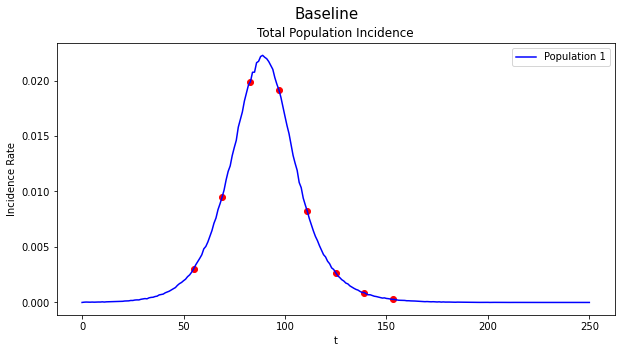

In [33]:
df_sim0_seir_outpus = pd.read_csv("https://raw.githubusercontent.com/pargaw/pyCt/main/Data/Scenario_0/Simulation__seir_outputs_1.csv")
sim0_incs = np.array(df_sim0_seir_outpus["inc"])
N0 = 1000000
max_time_0 = 250

# visualize results
fig, ax = plt.subplots(1, 1, figsize=(10, 5)) # make a figure with one row and one column of size 10x5

# Plot the prior samples
ax.plot(np.arange(len(sim0_incs)), sim0_incs / N0, color='blue', label='Population 1')
# Plot test times
ax.scatter(test_times0, sim0_incs[test_times0] / N0, color='red')

ax.set_title('Total Population Incidence')
ax.legend(loc='best')
ax.set_xlabel('t')
ax.set_ylabel('Incidence Rate')

plt.suptitle('Baseline', size=15)

plt.savefig('scenario0_inc.pdf')
files.download('scenario0_inc.pdf')

plt.show() # display the figure

In [ ]:
all_beta_means_sim0, all_beta_samples_sim0, pi0_means_sim0, pi0_samples_sim0 = run_exp_session_with_all_cts(test_times0, df_sim0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
CompoundStep
>Metropolis: [pi0]
>Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 51 seconds.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
CompoundStep
>Metropolis: [pi0]
>Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 54 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
CompoundStep
>Metropolis: [pi0]
>Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 63 seconds.
The number of effective samples is smaller than 10% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
CompoundStep
>Metropolis: [pi0]
>Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 72 seconds.
The number of effective samples is smaller than 10% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
CompoundStep
>Metropolis: [pi0]
>Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 69 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
CompoundStep
>Metropolis: [pi0]
>Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 60 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
CompoundStep
>Metropolis: [pi0]
>Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 55 seconds.
The number of effective samples is smaller than 10% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
CompoundStep
>Metropolis: [pi0]
>Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 53 seconds.
The number of effective samples is smaller than 10% for some parameters.


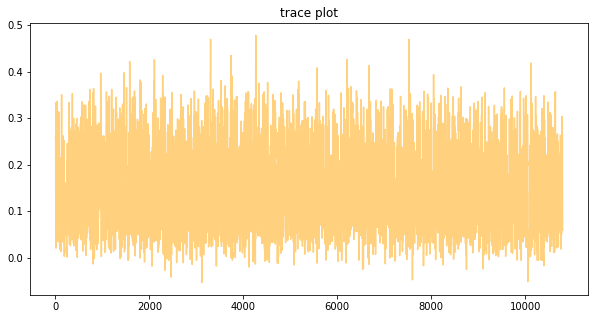

In [ ]:
plot_trace(all_beta_samples_sim0[0])

In [ ]:
user_beta_means_sim0, user_beta_samples_sim0 = run_exp_session_with_observable_cts(test_times0, df_sim0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 34 seconds.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 36 seconds.
The number of effective samples is smaller than 10% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 39 seconds.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 43 seconds.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 41 seconds.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 37 seconds.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 36 seconds.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 35 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [ ]:
true_rates_0 = generate_true_rates(sim0_incs, test_times0, N0)
true_rates_0

[0.09334289475326975,
 0.08781830024853986,
 0.06986339718630738,
 0.032384411890853455,
 -0.02107787169681096,
 -0.06320105558479688,
 -0.07950986349734199,
 -0.07915060640284051]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

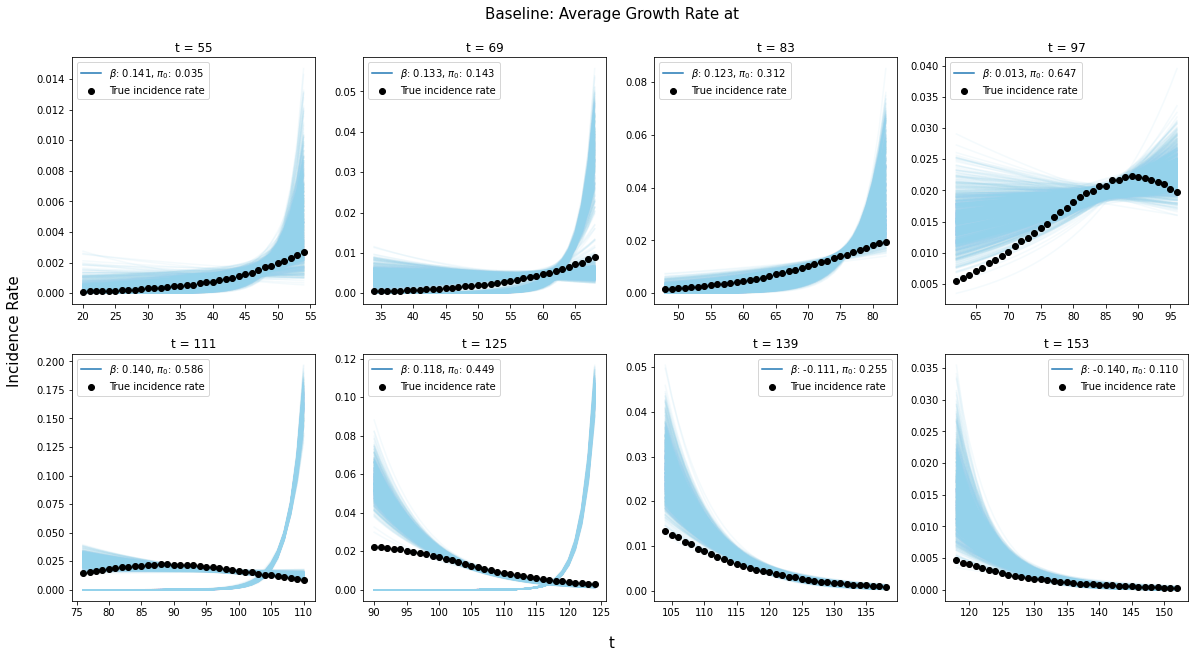

In [ ]:
plot_growth_rate_preds_for_all('0_all', 'Baseline', [all_beta_samples_sim0], [all_beta_means_sim0], [pi0_samples_sim0], [pi0_means_sim0],
                               test_times0, [sim0_incs], N0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

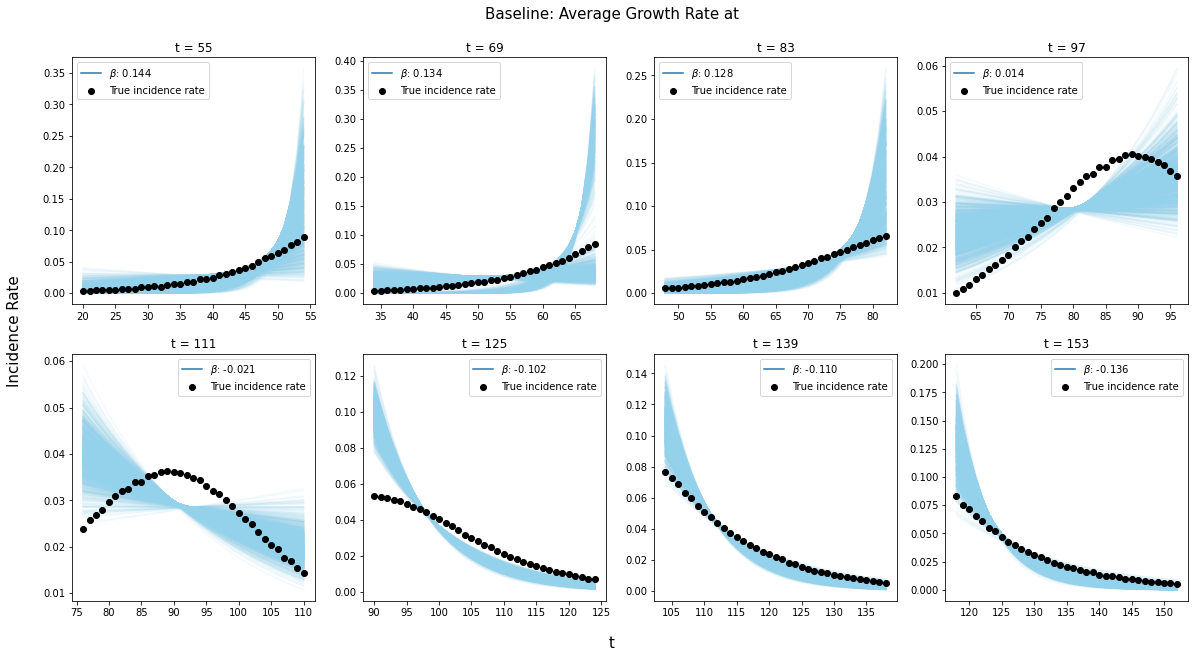

In [ ]:
plot_growth_rate_preds_for_times('0_obs', 'Baseline', [user_beta_samples_sim0], [user_beta_means_sim0], 
                                 test_times0, [sim0_incs])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

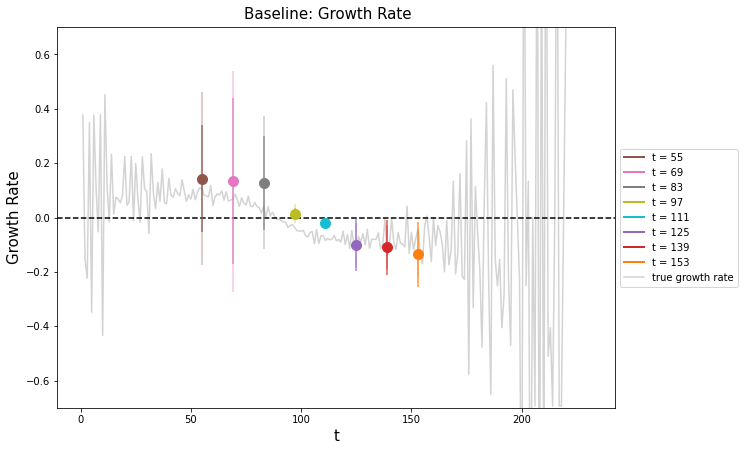

In [ ]:
plot_agg_growth_rate_preds_for_times('0_obs', 'Baseline', max_time_0, 
                                     [user_beta_samples_sim0], [user_beta_means_sim0], 
                                     test_times0, [true_rates_0], [sim0_incs], N0)

## Scenario 1
---

In [34]:
df_sim1_1 = pd.read_csv('https://raw.githubusercontent.com/pargaw/pyCt/main/Data/Scenario_1/Simulation__cts_1.csv')
df_sim1_2 = pd.read_csv('https://raw.githubusercontent.com/pargaw/pyCt/main/Data/Scenario_1/Simulation__cts_2.csv')
# test times for both ct distributions are the same
test_times_1 = df_sim1_1['t'].unique()

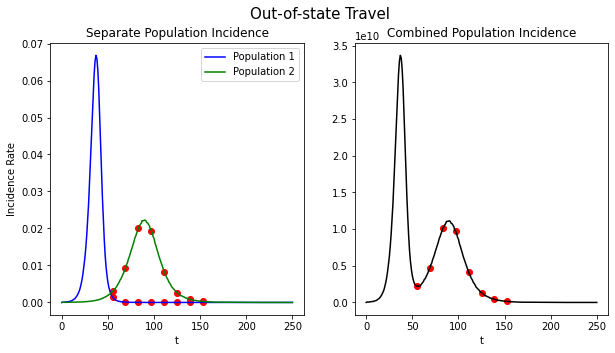

In [35]:
df_sim1_seir_1 = pd.read_csv("https://raw.githubusercontent.com/pargaw/pyCt/main/Data/Scenario_1/Simulation__seir_outputs_1.csv")
df_sim1_seir_2 = pd.read_csv("https://raw.githubusercontent.com/pargaw/pyCt/main/Data/Scenario_1/Simulation__seir_outputs_2.csv")
sim1_1_incs = np.array(df_sim1_seir_1["inc"])
sim1_2_incs = np.array(df_sim1_seir_2["inc"])
N1_1 = 1000000
N1_2 = 1000000
max_time_1 = 250

# visualize results
fig, ax = plt.subplots(1, 2, figsize=(10, 5)) # make a figure with one row and one column of size 10x5

# Plot the prior samples
ax[0].plot(np.arange(len(sim1_1_incs)), sim1_1_incs / N1_1, color='blue', label='Population 1')
ax[0].plot(np.arange(len(sim1_2_incs)), sim1_2_incs / N1_2, color='green', label='Population 2')
# Plot test times
ax[0].scatter(test_times_1, sim1_1_incs[test_times_1] / N1_1, color='red')
ax[0].scatter(test_times_1, sim1_2_incs[test_times_1] / N1_2, color='red')

# Plot the prior samples
ax[1].plot(np.arange(len(sim1_1_incs)), (sim1_1_incs + sim1_2_incs) / 2*N1_1, color='black', label='Combined Population')
# Plot test times
ax[1].scatter(test_times_1, (sim1_1_incs[test_times_1] + sim1_2_incs[test_times_1]) / 2*N1_1, color='red')

ax[0].set_title('Separate Population Incidence')
ax[1].set_title('Combined Population Incidence')
ax[0].set_xlabel('t')
ax[1].set_xlabel('t')
ax[0].set_ylabel('Incidence Rate')
ax[0].legend(loc='best')
# ax[1].legend(loc='best')

plt.suptitle('Out-of-state Travel', size=15)

plt.savefig('scenario1_inc.pdf')
files.download('scenario1_inc.pdf') 

plt.show() # display the figure

In [ ]:
all_beta_means_sim1, all_beta_samples_sim1, pi0_means_sim1, pi0_samples_sim1 = run_exp_session_with_all_cts(test_times_1, df_sim1_1, df_sim1_2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
CompoundStep
>Metropolis: [pi0]
>Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 87 seconds.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
CompoundStep
>Metropolis: [pi0]
>Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 65 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
CompoundStep
>Metropolis: [pi0]
>Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 66 seconds.
The number of effective samples is smaller than 10% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
CompoundStep
>Metropolis: [pi0]
>Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 72 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
CompoundStep
>Metropolis: [pi0]
>Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 70 seconds.
The number of effective samples is smaller than 10% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
CompoundStep
>Metropolis: [pi0]
>Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 60 seconds.
The number of effective samples is smaller than 10% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
CompoundStep
>Metropolis: [pi0]
>Metropolis: [beta]
/usr/local/lib/python3.7/dist-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 56 seconds.
The number of effective samples is smaller than 10% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
CompoundStep
>Metropolis: [pi0]
>Metropolis: [beta]


/usr/local/lib/python3.7/dist-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/usr/local/lib/python3.7/dist-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 53 seconds.
The number of effective samples is smaller than 10% for some parameters.


In [ ]:
user_beta_means_sim1, user_beta_samples_sim1 = run_exp_session_with_observable_cts(test_times_1, df_sim1_1, df_sim1_2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 48 seconds.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 39 seconds.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 39 seconds.
The number of effective samples is smaller than 10% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 43 seconds.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 42 seconds.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 37 seconds.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 35 seconds.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 35 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [ ]:
true_rates_1 = generate_true_rates(sim1_1_incs + sim1_2_incs, test_times_1, N1_1+N1_2)
true_rates_1

[-0.004932901525582636,
 -0.05141250576244839,
 0.023703679653489056,
 0.03138588350464528,
 -0.019918823790179636,
 -0.06288390001369223,
 -0.08091518430072632,
 -0.08330073705750143]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

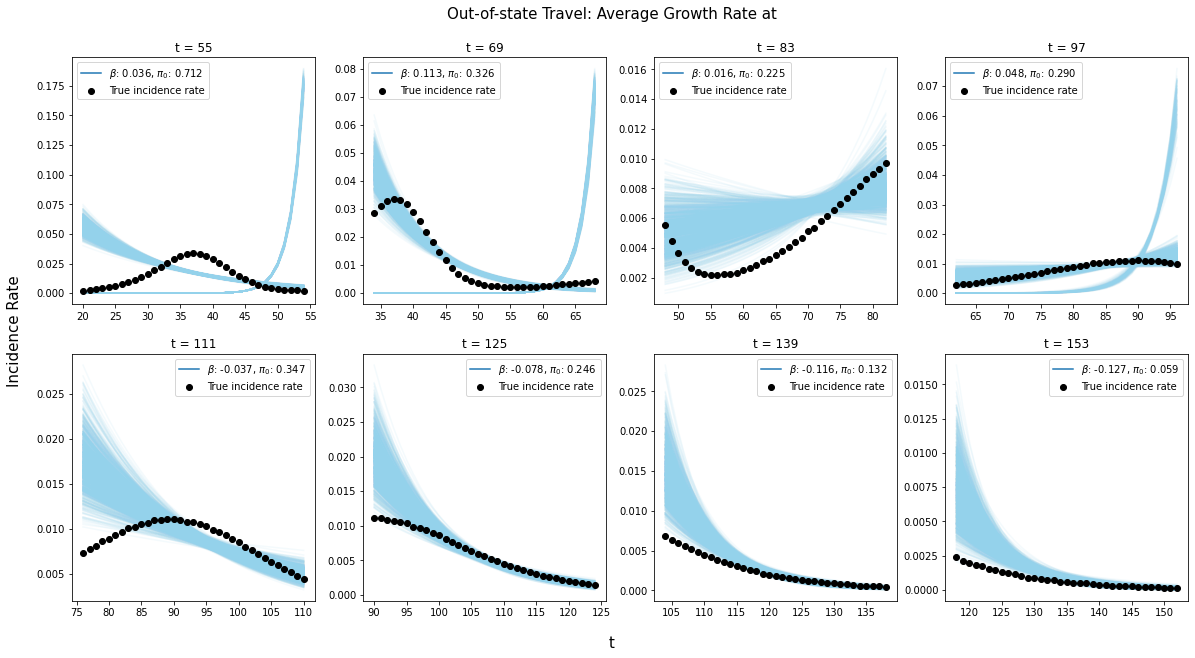

In [ ]:
plot_growth_rate_preds_for_all('1_all', 'Out-of-state Travel', [all_beta_samples_sim1], [all_beta_means_sim1], [pi0_samples_sim1], [pi0_means_sim1],
                               test_times_1, [sim1_1_incs + sim1_2_incs], N1_1+N1_2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

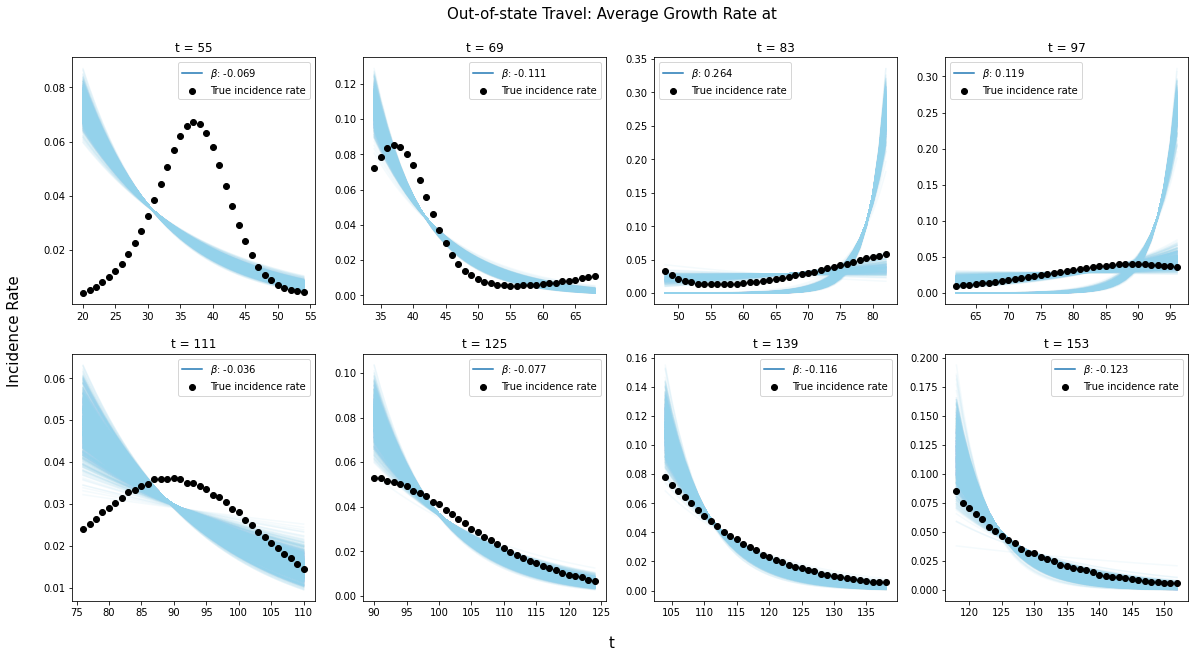

In [ ]:
plot_growth_rate_preds_for_times('1_obs', 'Out-of-state Travel', [user_beta_samples_sim1], [user_beta_means_sim1], 
                                 test_times_1, [sim1_1_incs + sim1_2_incs])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

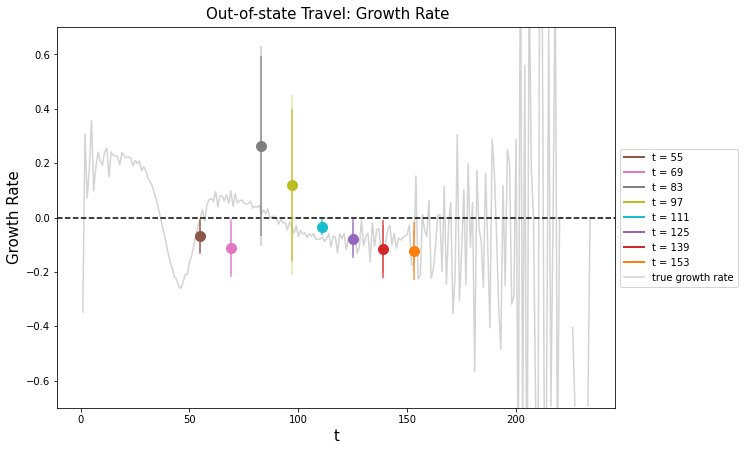

In [ ]:
plot_agg_growth_rate_preds_for_times('1_obs', 'Out-of-state Travel', max_time_1, 
                                     [user_beta_samples_sim1], [user_beta_means_sim1], 
                                     test_times_1, [true_rates_1], [sim1_1_incs + sim1_2_incs], N1_1+N1_2)

## Scenario 2
---

Note: changes in population size $N$ is determined by this simulation paramaeter document: https://docs.google.com/document/d/1Segib1GudnU9ZG4GBw2eRNyDShH1f2PcUY6FVBwS5RU/edit

In [36]:
df_sim2_1 = pd.read_csv('https://raw.githubusercontent.com/pargaw/pyCt/main/Data/Scenario_2/Simulation__cts_1.csv')
df_sim2_2 = pd.read_csv('https://raw.githubusercontent.com/pargaw/pyCt/main/Data/Scenario_2/Simulation__cts_2.csv')
# test times for both ct distributions are the same
test_times_2 = df_sim2_1['t'].unique()

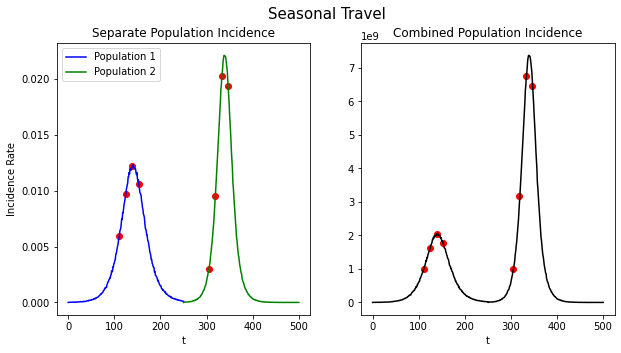

In [37]:
df_sim2_seir_1 = pd.read_csv("https://raw.githubusercontent.com/pargaw/pyCt/main/Data/Scenario_2/Simulation__seir_outputs_1.csv")
df_sim2_seir_2 = pd.read_csv("https://raw.githubusercontent.com/pargaw/pyCt/main/Data/Scenario_2/Simulation__seir_outputs_2.csv")

sim2_1_incs = np.array(df_sim2_seir_1["inc"])
sim2_2_incs = np.array(df_sim2_seir_2["inc"])
total_incs = np.hstack((sim2_1_incs, sim2_2_incs))
N2_1 = 500000
N2_2 = 1000000
max_time_2 = 500

# visualize results
fig, ax = plt.subplots(1, 2, figsize=(10, 5)) # make a figure with one row and one column of size 10x5

# Plot the prior samples
ax[0].plot(np.arange(len(sim2_1_incs)), sim2_1_incs / N2_1, color='blue', label='Population 1')
ax[0].plot(np.arange(250, len(sim2_2_incs) + 250), sim2_2_incs / N2_2, color='green', label='Population 2')
# Plot test times
ax[0].scatter(test_times_2[4:], sim2_1_incs[test_times_2[4:]] / N2_1, color='red')
ax[0].scatter(test_times_2[:4] + 250, sim2_2_incs[test_times_2[:4]] / N2_2, color='red')

# Plot the prior samples
ax[1].plot(np.arange(len(total_incs)), total_incs / 1.5*N2_1, color='black', label='Combined Population')
# Plot test times
ax[1].scatter(test_times_2[4:], sim2_1_incs[test_times_2[4:]] / 1.5*N2_1, color='red')
ax[1].scatter(test_times_2[:4] + 250, sim2_2_incs[test_times_2[:4]] / 1.5*N2_1, color='red')

ax[0].set_title('Separate Population Incidence')
ax[1].set_title('Combined Population Incidence')
ax[0].set_xlabel('t')
ax[1].set_xlabel('t')
ax[0].set_ylabel('Incidence Rate')
ax[0].legend(loc='best')
# ax[1].legend(loc='best')

plt.suptitle('Seasonal Travel', size=15)

plt.savefig('scenario2_inc.pdf')
files.download('scenario2_inc.pdf') 

plt.show() # display the figure

In [ ]:
# shift population 2 times by 250 days
test_times_2_modified = np.hstack((test_times_2, (test_times_2 + 250)))
test_times_2_modified

array([ 55,  69,  83,  97, 111, 125, 139, 153, 305, 319, 333, 347, 361,
       375, 389, 403])

In [ ]:
all_beta_means_sim2, all_beta_samples_sim2, pi0_means_sim2, pi0_samples_sim2 = run_exp_session_with_all_cts(test_times_2_modified, df_sim2_1, df_sim2_2, True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
CompoundStep
>Metropolis: [pi0]
>Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 51 seconds.
The number of effective samples is smaller than 10% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
CompoundStep
>Metropolis: [pi0]
>Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 52 seconds.
The number of effective samples is smaller than 10% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
CompoundStep
>Metropolis: [pi0]
>Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 53 seconds.
The number of effective samples is smaller than 10% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
CompoundStep
>Metropolis: [pi0]
>Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 54 seconds.
The number of effective samples is smaller than 10% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
CompoundStep
>Metropolis: [pi0]
>Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 67 seconds.
The number of effective samples is smaller than 10% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
CompoundStep
>Metropolis: [pi0]
>Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 65 seconds.
The number of effective samples is smaller than 10% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
CompoundStep
>Metropolis: [pi0]
>Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 66 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
CompoundStep
>Metropolis: [pi0]
>Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 67 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
CompoundStep
>Metropolis: [pi0]
>Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 53 seconds.
The number of effective samples is smaller than 10% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
CompoundStep
>Metropolis: [pi0]
>Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 56 seconds.
The number of effective samples is smaller than 10% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
CompoundStep
>Metropolis: [pi0]
>Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 65 seconds.
The number of effective samples is smaller than 10% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
CompoundStep
>Metropolis: [pi0]
>Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 75 seconds.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
CompoundStep
>Metropolis: [pi0]
>Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 71 seconds.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
CompoundStep
>Metropolis: [pi0]
>Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 61 seconds.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
CompoundStep
>Metropolis: [pi0]
>Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 56 seconds.
The number of effective samples is smaller than 10% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
CompoundStep
>Metropolis: [pi0]
>Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 53 seconds.
The number of effective samples is smaller than 10% for some parameters.


In [ ]:
user_beta_means_sim2, user_beta_samples_sim2 = run_exp_session_with_observable_cts(test_times_2_modified, df_sim2_1, df_sim2_2, True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 33 seconds.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 33 seconds.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 34 seconds.
The number of effective samples is smaller than 10% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 35 seconds.
The number of effective samples is smaller than 10% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 35 seconds.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 36 seconds.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 39 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 40 seconds.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 34 seconds.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 36 seconds.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 39 seconds.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 44 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 42 seconds.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 37 seconds.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 36 seconds.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 35 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [ ]:
true_rates_2_first250 = generate_true_rates(sim2_1_incs, test_times_2, N2_1)
true_rates_2_last250 = generate_true_rates(sim2_2_incs, test_times_2, N2_2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

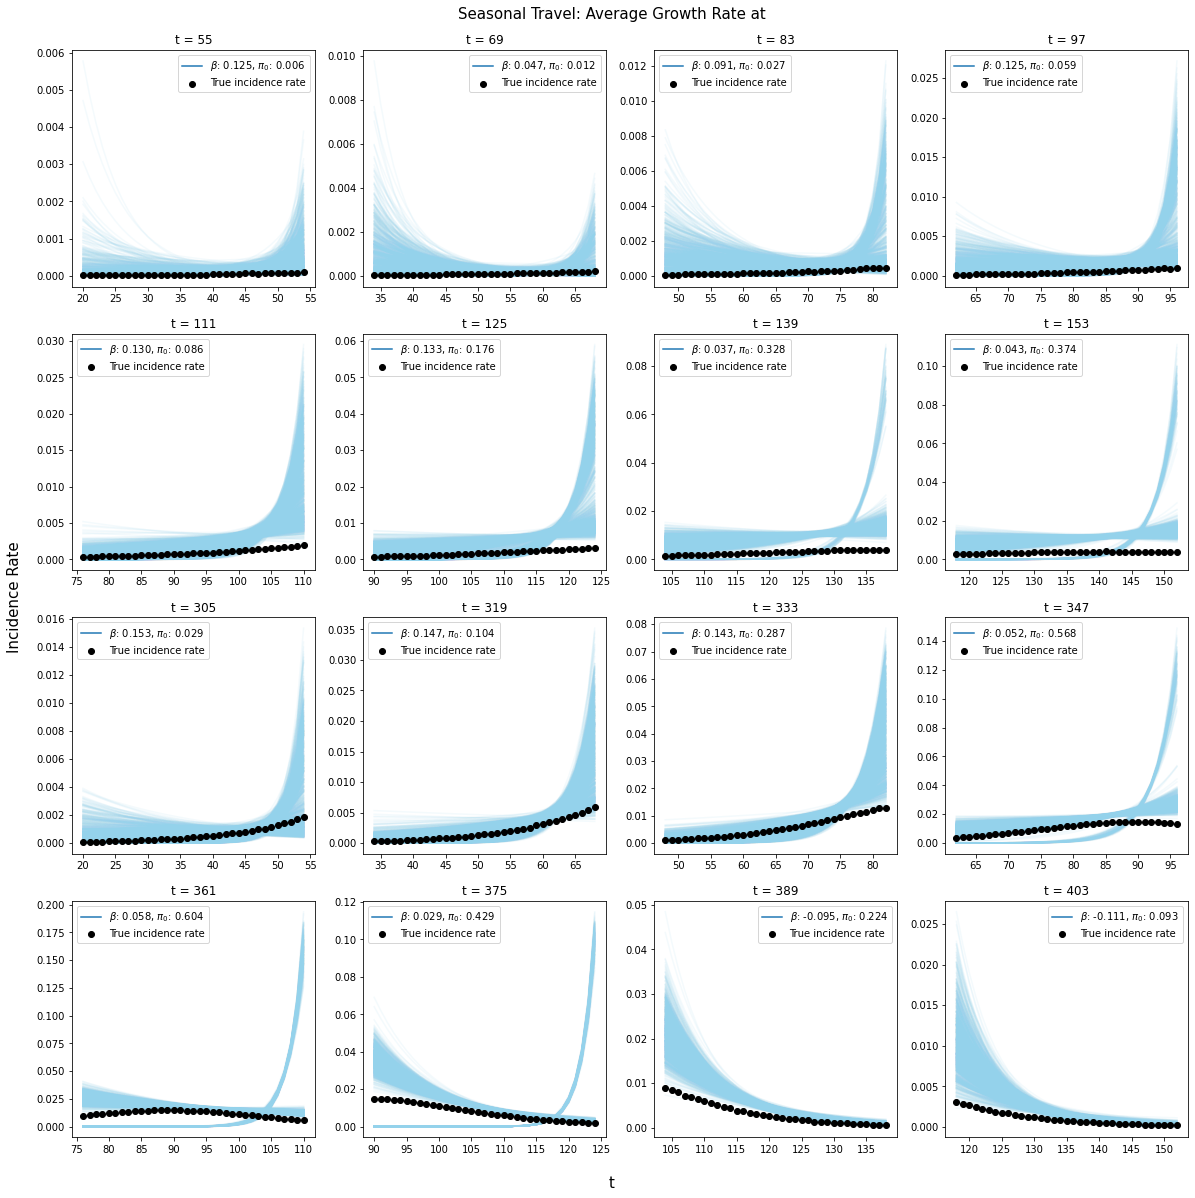

In [ ]:
plot_growth_rate_preds_for_all('2_all', 'Seasonal Travel',
                               [all_beta_samples_sim2[:8], all_beta_samples_sim2[8:]], 
                               [all_beta_means_sim2[:8], all_beta_means_sim2[8:]],
                               [pi0_samples_sim2[:8], pi0_samples_sim2[8:]],
                               [pi0_means_sim2[:8], pi0_means_sim2[8:]],
                               test_times_2, 
                               [sim2_1_incs, sim2_2_incs], N2_1+N2_2, True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

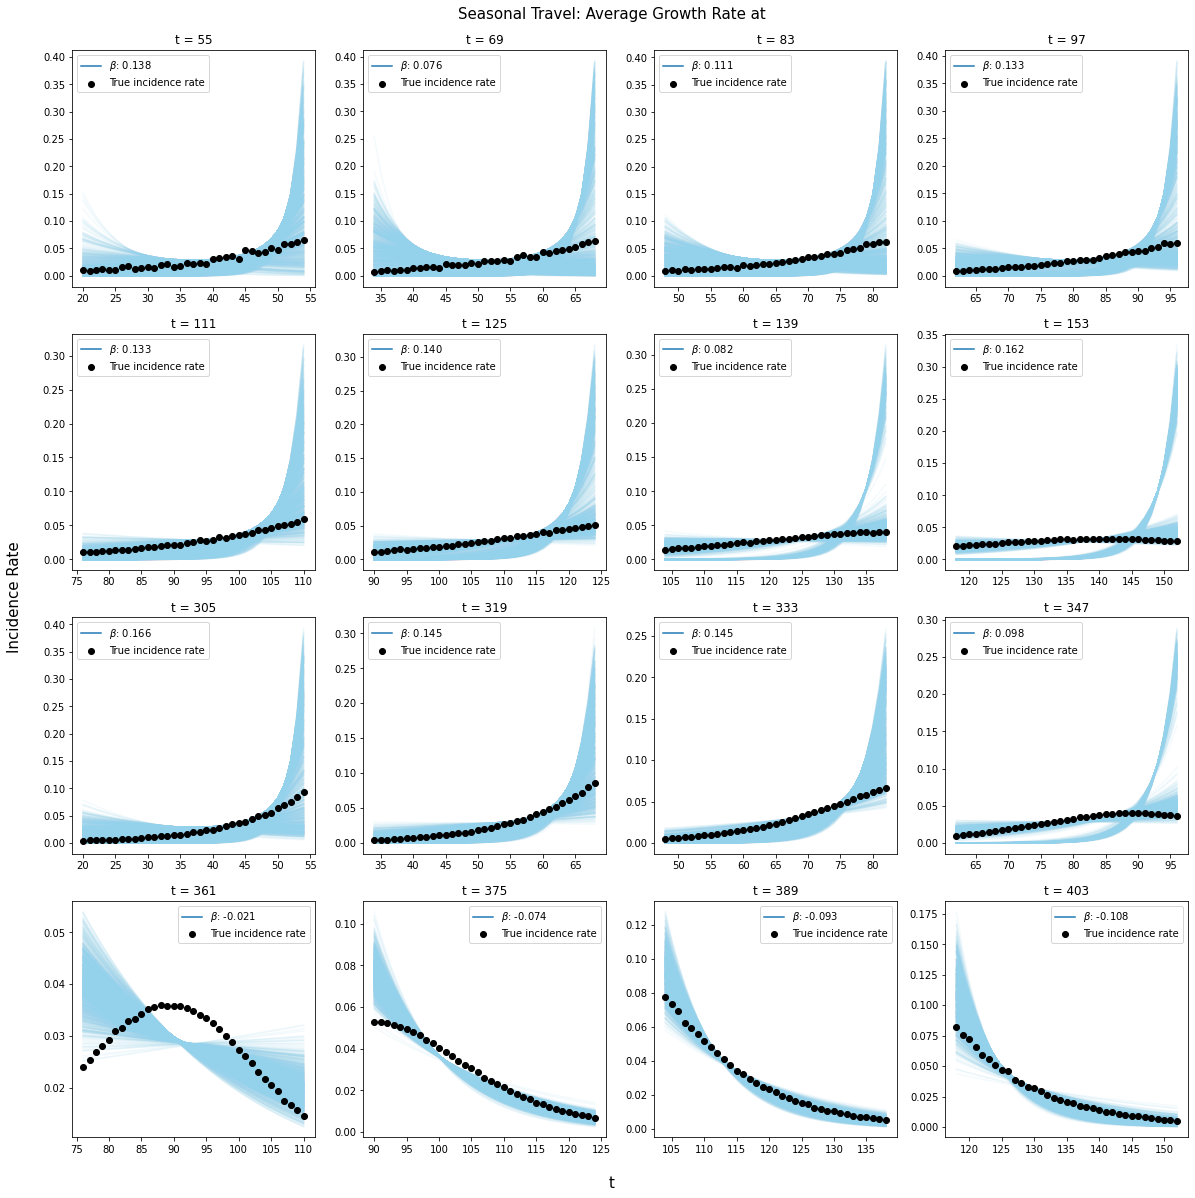

In [ ]:
plot_growth_rate_preds_for_times('2_obs', 'Seasonal Travel', 
                                 [user_beta_samples_sim2[:8], user_beta_samples_sim2[8:]], 
                                 [user_beta_means_sim2[:8], user_beta_means_sim2[8:]], 
                                 test_times_2,  
                                 [sim2_1_incs, sim2_2_incs], True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

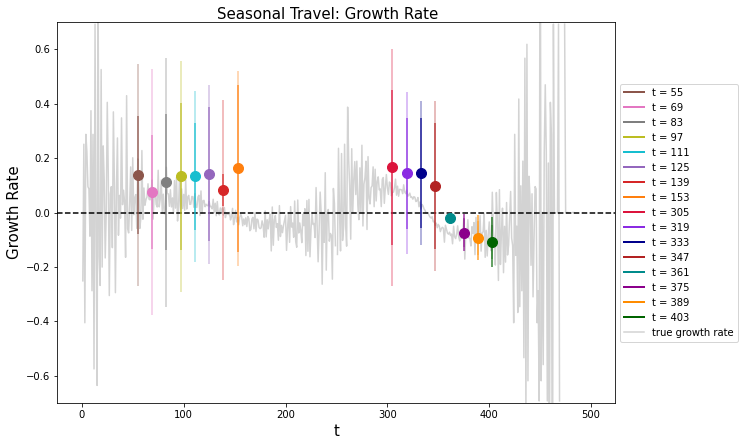

In [ ]:
plot_agg_growth_rate_preds_for_times('2_obs', 'Seasonal Travel', max_time_2, 
                                     [user_beta_samples_sim2[:8], user_beta_samples_sim2[8:]],
                                     [user_beta_means_sim2[:8], user_beta_means_sim2[8:]], 
                                     test_times_2, [true_rates_2_first250, true_rates_2_last250], [sim2_1_incs, sim2_2_incs], N2_1+N2_2, True)

## Scenario 3
---

In [39]:
df_sim3_1 = pd.read_csv('https://raw.githubusercontent.com/pargaw/pyCt/main/Data/Scenario_3/Simulation__cts_1.csv')
df_sim3_2 = pd.read_csv('https://raw.githubusercontent.com/pargaw/pyCt/main/Data/Scenario_3/Simulation__cts_2.csv')
# test times for both ct distributions are the same
test_times_3 = df_sim3_1['t'].unique()

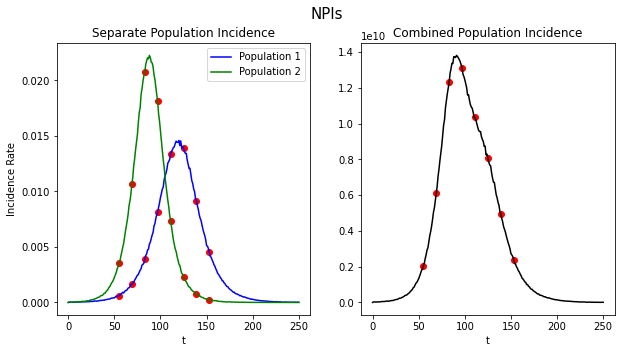

In [40]:
df_sim3_seir_1 = pd.read_csv("https://raw.githubusercontent.com/pargaw/pyCt/main/Data/Scenario_3/Simulation__seir_outputs_1.csv")
df_sim3_seir_2 = pd.read_csv("https://raw.githubusercontent.com/pargaw/pyCt/main/Data/Scenario_3/Simulation__seir_outputs_2.csv")

sim3_1_incs = np.array(df_sim3_seir_1["inc"])
sim3_2_incs = np.array(df_sim3_seir_2["inc"])
N3_1 = 1000000
N3_2 = 1000000
max_time_3 = 250

# visualize results
fig, ax = plt.subplots(1, 2, figsize=(10, 5)) # make a figure with one row and one column of size 10x5

# Plot the prior samples
ax[0].plot(np.arange(len(sim3_1_incs)), sim3_1_incs / N3_1, color='blue', label='Population 1')
ax[0].plot(np.arange(len(sim3_2_incs)), sim3_2_incs / N3_2, color='green', label='Population 2')
# Plot test times
ax[0].scatter(test_times_3, sim3_1_incs[test_times_3] / N3_1, color='red')
ax[0].scatter(test_times_3, sim3_2_incs[test_times_3] / N3_2, color='red')

# Plot the prior samples
ax[1].plot(np.arange(len(sim3_1_incs)), (sim3_1_incs + sim3_2_incs) / 2*N3_1, color='black', label='Combined Population')
# Plot test times
ax[1].scatter(test_times_3, (sim3_1_incs[test_times_3] + sim3_2_incs[test_times_3]) / 2*N3_1, color='red')

ax[0].set_title('Separate Population Incidence')
ax[1].set_title('Combined Population Incidence')
ax[0].set_xlabel('t')
ax[1].set_xlabel('t')
ax[0].set_ylabel('Incidence Rate')
ax[0].legend(loc='best')
# ax[1].legend(loc='best')

plt.suptitle('NPIs', size=15)

plt.savefig('scenario3_inc.pdf')
files.download('scenario3_inc.pdf') 

plt.show() # display the figure

In [ ]:
all_beta_means_sim3, all_beta_samples_sim3, pi0_means_sim3, pi0_samples_sim3 = run_exp_session_with_all_cts(test_times_3, df_sim3_1, df_sim3_2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
CompoundStep
>Metropolis: [pi0]
>Metropolis: [beta]
/usr/local/lib/python3.7/dist-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),


/usr/local/lib/python3.7/dist-packages/pymc3/step_methods/metropolis.py:226: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 53 seconds.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
CompoundStep
>Metropolis: [pi0]
>Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 58 seconds.
The number of effective samples is smaller than 10% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
CompoundStep
>Metropolis: [pi0]
>Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 68 seconds.
The number of effective samples is smaller than 10% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
CompoundStep
>Metropolis: [pi0]
>Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 80 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
CompoundStep
>Metropolis: [pi0]
>Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 81 seconds.
The number of effective samples is smaller than 10% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
CompoundStep
>Metropolis: [pi0]
>Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 75 seconds.
The number of effective samples is smaller than 10% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
CompoundStep
>Metropolis: [pi0]
>Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 68 seconds.
The number of effective samples is smaller than 10% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
CompoundStep
>Metropolis: [pi0]
>Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 63 seconds.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


In [ ]:
user_beta_means_sim3, user_beta_samples_sim3 = run_exp_session_with_observable_cts(test_times_3, df_sim3_1, df_sim3_2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 34 seconds.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 36 seconds.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 40 seconds.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 46 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 47 seconds.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 44 seconds.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 40 seconds.
The number of effective samples is smaller than 25% for some parameters.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  import sys
Multiprocess sampling (6 chains in 4 jobs)
Metropolis: [beta]


Sampling 6 chains for 8_000 tune and 4_000 draw iterations (48_000 + 24_000 draws total) took 38 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [ ]:
true_rates_3 = generate_true_rates(sim3_1_incs + sim3_2_incs, test_times_3, N3_1+N3_2)
true_rates_3

[0.08544847959108753,
 0.08064473068777352,
 0.06701164363720544,
 0.033332660920446164,
 0.0007951218749107878,
 -0.016164431091084962,
 -0.025038643428597372,
 -0.04090922920934361]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

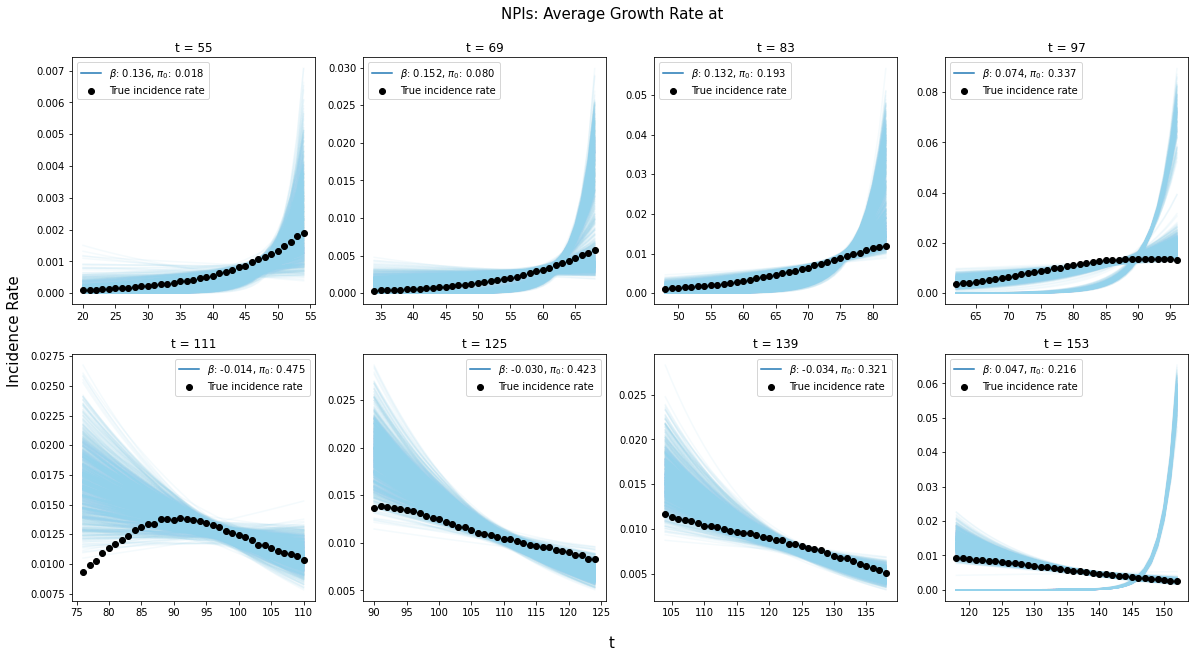

In [ ]:
 plot_growth_rate_preds_for_all('3_all', 'NPIs', [all_beta_samples_sim3], [all_beta_means_sim3], [pi0_samples_sim3], [pi0_means_sim3], 
                               test_times_3, [sim3_1_incs + sim3_2_incs], N3_1+N3_2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

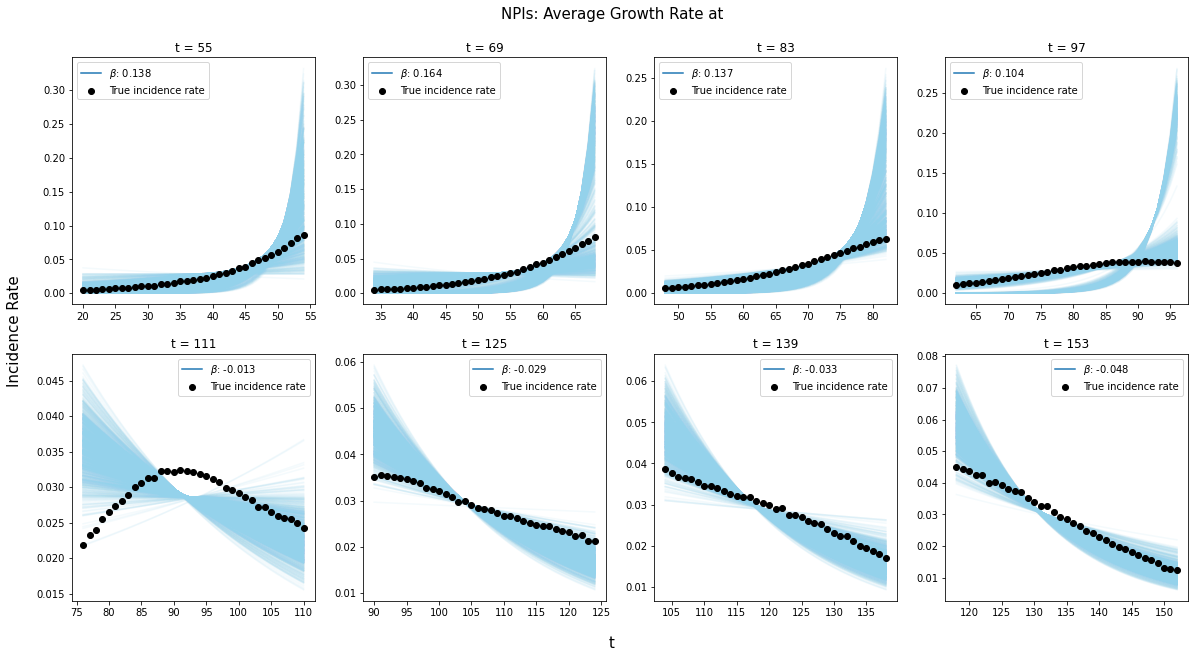

In [ ]:
plot_growth_rate_preds_for_times('3_obs', 'NPIs', [user_beta_samples_sim3], [user_beta_means_sim3], 
                                 test_times_3, [sim3_1_incs + sim3_2_incs])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

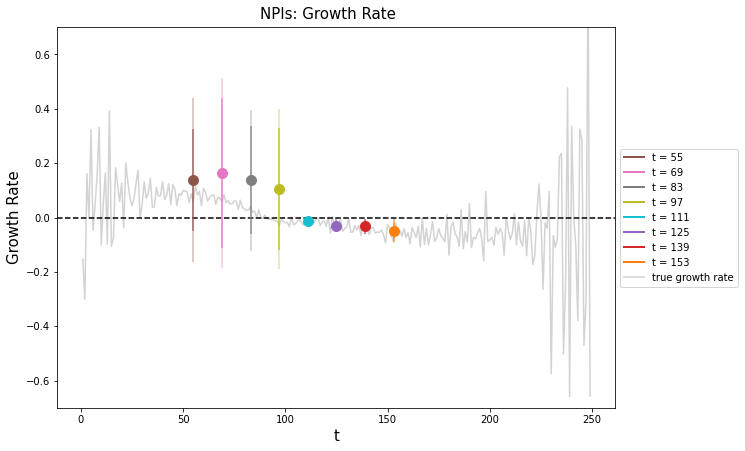

In [ ]:
plot_agg_growth_rate_preds_for_times('3_obs', 'NPIs', max_time_3, 
                                     [user_beta_samples_sim3], [user_beta_means_sim3], 
                                     test_times_3, [true_rates_1], [sim3_1_incs + sim3_2_incs], N3_1+N3_2)